In [2]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima


In [3]:
data = pd.read_csv('report.csv')

In [4]:
data.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10


In [5]:
data.shape

(2829, 15)

In [6]:
len(data['report_year'].unique())

41

In [7]:
data.reset_index(drop=True)

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824,2015,OK07205,"Tulsa, OK",401520.0,3628.0,55.0,365.0,2354.0,854.0,NaN,903.57,13.70,90.90,586.27,212.69
2825,2015,VA12800,"Virginia Beach, VA",452797.0,626.0,19.0,103.0,234.0,270.0,NaN,138.25,4.20,22.75,51.68,59.63
2826,2015,DCMPD00,"Washington, DC",672228.0,8084.0,162.0,494.0,4024.0,3404.0,NaN,1202.57,24.10,73.49,598.61,506.38
2827,2015,KS08703,"Wichita, KS",389824.0,3839.0,27.0,349.0,2730.0,733.0,NaN,984.80,6.93,89.53,700.32,188.03


In [8]:
data.isnull().sum()

report_year              0
agency_code             41
agency_jurisdiction      0
population              69
violent_crimes          35
homicides               34
rapes                   75
assaults                76
robberies               75
months_reported        137
crimes_percapita        35
homicides_percapita     34
rapes_percapita         75
assaults_percapita      76
robberies_percapita     75
dtype: int64

In [9]:
data.isnull().sum()

report_year              0
agency_code             41
agency_jurisdiction      0
population              69
violent_crimes          35
homicides               34
rapes                   75
assaults                76
robberies               75
months_reported        137
crimes_percapita        35
homicides_percapita     34
rapes_percapita         75
assaults_percapita      76
robberies_percapita     75
dtype: int64

In [10]:
data=data[['report_year','agency_jurisdiction','rapes']]

In [11]:
data.head()

,report_year,agency_jurisdiction,rapes
0,1975,"Albuquerque, NM",181.0
1,1975,"Arlington, TX",28.0
2,1975,"Atlanta, GA",443.0
3,1975,"Aurora, CO",44.0
4,1975,"Austin, TX",190.0


In [12]:
df=data.loc[data['agency_jurisdiction'] == 'Chicago, IL']

In [13]:
df.head()

,report_year,agency_jurisdiction,rapes
10,1975,"Chicago, IL",1657.0
79,1976,"Chicago, IL",1179.0
148,1977,"Chicago, IL",1227.0
217,1978,"Chicago, IL",1341.0
286,1979,"Chicago, IL",1655.0


In [14]:
df.isnull().sum()

report_year            0
agency_jurisdiction    0
rapes                  0
dtype: int64

In [15]:
df.reset_index(drop=True)

,report_year,agency_jurisdiction,rapes
0,1975,"Chicago, IL",1657.0
1,1976,"Chicago, IL",1179.0
2,1977,"Chicago, IL",1227.0
3,1978,"Chicago, IL",1341.0
4,1979,"Chicago, IL",1655.0
5,1980,"Chicago, IL",1329.0
6,1981,"Chicago, IL",1255.0
7,1982,"Chicago, IL",1112.0
8,1983,"Chicago, IL",2246.0
9,1984,"Chicago, IL",2883.0


In [16]:
hc=df[['report_year','rapes']]
hc.set_index('report_year',inplace=True)
hc.shape

(41, 1)

In [17]:
hc.head()

,rapes
report_year,
1975,1657.0
1976,1179.0
1977,1227.0
1978,1341.0
1979,1655.0


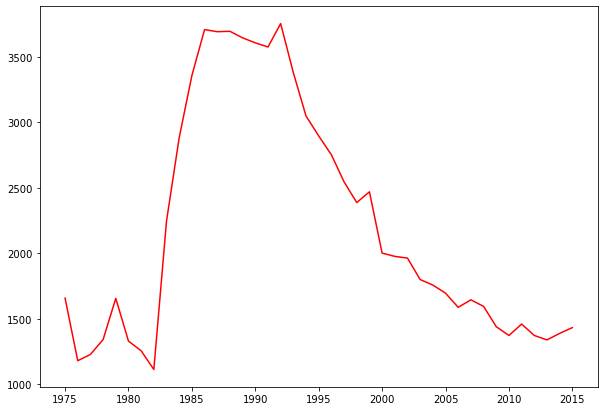

In [18]:
plt.figure(figsize=(10,7))
plt.plot(hc,'r-')

In [19]:
diff = hc.diff(periods=1)

In [20]:
diff = diff[1:]
diff.head()

,rapes
report_year,
1976,-478.0
1977,48.0
1978,114.0
1979,314.0
1980,-326.0


40

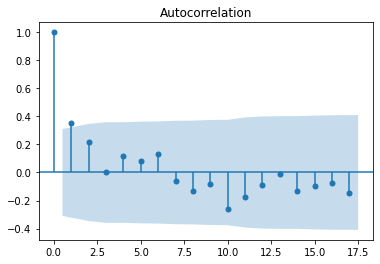

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diff)
diff.size


<AxesSubplot:xlabel='report_year'>

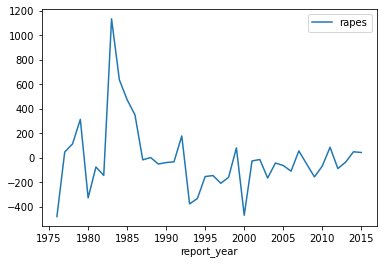

In [22]:
diff.plot()

In [23]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(hc)


(0.5679216785620337, True)

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
result = adfuller(hc, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -1.8115296685844953
n_lags: 0.3747527436988478
p-value: 0.3747527436988478
Critial Values:
   1%, -3.6699197407407405
Critial Values:
   5%, -2.9640707407407407
Critial Values:
   10%, -2.621171111111111


In [26]:
train=diff[:34]
test=diff[33:]

In [27]:
train.tail()

,rapes
report_year,
2005,-62.0
2006,-108.0
2007,57.0
2008,-50.0
2009,-155.0


In [28]:
test.head()
test.size

7

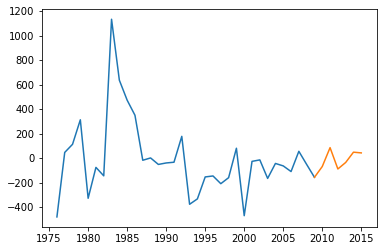

In [29]:
plt.plot(train)
plt.plot(test)

C:\Users\manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\manish\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-41-1bde7242a609>:4: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  model2 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12, damped=True)
C:\Users\manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. 

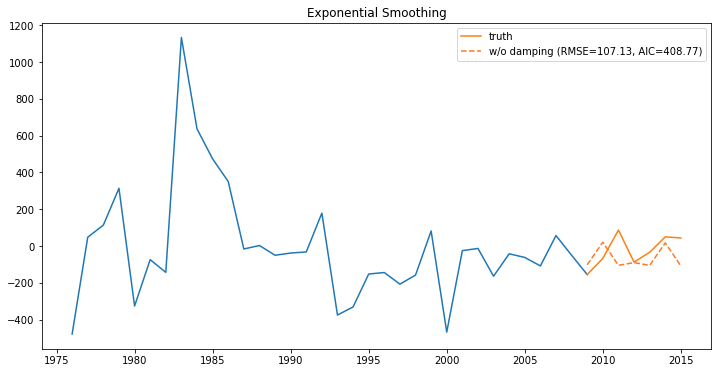

In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=4)
model2 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12, damped=True)
fit = model.fit()
pred = fit.forecast(7)
#fit2 = model2.fit()
#pred2 = fit2.forecast(7)

sse1 = np.sqrt(np.mean(np.square(test.values - pred.values)))
#sse2 = np.sqrt(np.mean(np.square(test.values - pred2.values)))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index[:34], train.values[:34]);
ax.plot(test.index, test.values, label='truth');
ax.plot(test.index, pred, linestyle='--', color='#ff7823',label="w/o damping (RMSE={:0.2f}, AIC={:0.2f})".format(sse1, fit.aic));
#ax.plot(test.index, pred2, linestyle='--', color='#3c763d',label="damped (RMSE={:0.2f}, AIC={:0.2f})".format(sse2, fit2.aic)); 
ax.legend();
ax.set_title("Exponential Smoothing");

In [42]:
from sklearn.metrics import r2_score
r2_score(test, pred)

-0.6839727712139052

In [32]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=10, max_d=5, max_q=10, start_P=0, 
                          D=0, start_Q=1, max_P=5, max_D=5,
                          max_Q=1, m=10, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,random_state=40,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,1)[10] intercept   : AIC=481.072, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[10] intercept   : AIC=483.017, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[10] intercept   : AIC=477.937, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[10] intercept   : AIC=474.874, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[10]             : AIC=481.044, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[10] intercept   : AIC=478.138, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[10] intercept   : AIC=476.161, Time=0.26 sec
 ARIMA(0,1,1)(1,0,0)[10] intercept   : AIC=474.570, Time=0.16 sec
 ARIMA(0,1,1)(2,0,0)[10] intercept   : AIC=476.137, Time=0.35 sec
 ARIMA(0,1,1)(2,0,1)[10] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,1,0)(1,0,0)[10] intercept   : AIC=480.553, Time=0.07 sec
 ARIMA(1,1,1)(1,0,0)[10] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,2)(1,0,0)[10] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,1,2)(1,0,0)[10] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,1)(1,0,0)[10]             : AIC=472.62

In [33]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 10)   Log Likelihood                -233.310
Date:                             Fri, 08 Jan 2021   AIC                            472.620
Time:                                     23:42:19   BIC                            477.110
Sample:                                          0   HQIC                           474.131
                                              - 34                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6618      0.213     -3.104      0.002      -1.080      -0.244
ar.S.L10      -0.5466      0.150     -3.632      0.000      -0.842      -0.252
sigma2      7.192e+04   1.82e+04      3.944      0.000    3.62e+04    1.08e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):                33.26
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                             1.35
Prob(H) (two-sided):                  0.03   Kurtosis:                         7.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 7),index=test.index)
prediction.columns = ['predicted_Rapes_Rate_for_LA']
prediction

,predicted_Rapes_Rate_for_LA
report_year,
2009,128.535028
2010,-113.618164
2011,-120.177618
2012,-37.637817
2013,-104.325603
2014,-93.393179
2015,-68.248604


Predicted Homicide Crime Rates of USA 


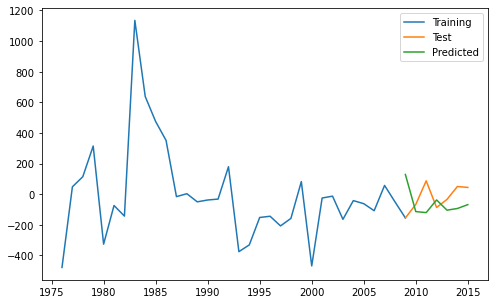

In [35]:
print("Predicted Homicide Crime Rates of USA ")
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import r2_score
r2_score(test, prediction)


-2.649458632309874